
# Test twitter data from github repo

Load data from github repo

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib


import os
import re

import networkx as nx
import nx_altair as nxa
import altair as alt

twittercol = '#1da1f2'

twittercol2 = "#0062a2"

range_twittercol = [twittercol,  "#0062a2"]

casecol = '#029006'

newscol = '#cc0000'

# Load Corona data


In [2]:
covid_data = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

covid_data["date"] = pd.to_datetime(covid_data["date"])

covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51798 entries, 0 to 51797
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         51501 non-null  object        
 1   continent                        51204 non-null  object        
 2   location                         51798 non-null  object        
 3   date                             51798 non-null  datetime64[ns]
 4   total_cases                      48191 non-null  float64       
 5   new_cases                        50916 non-null  float64       
 6   new_cases_smoothed               50128 non-null  float64       
 7   total_deaths                     39366 non-null  float64       
 8   new_deaths                       50916 non-null  float64       
 9   new_deaths_smoothed              50128 non-null  float64       
 10  total_cases_per_million          47930 non-null  float64  

In [3]:
covid_data["date"] = pd.to_datetime(covid_data["date"])

cov_selection = covid_data[["date", "total_cases", "new_cases", "new_deaths", "new_tests"]]

cov_selection = cov_selection.groupby('date').sum().reset_index()

start_date = '12-31-2019'
end_date = '04-07-2020'

mask = (cov_selection['date'] > start_date) & (cov_selection['date'] <= end_date)

cov_selection = cov_selection.loc[mask]

cov_selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1 to 98
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         98 non-null     datetime64[ns]
 1   total_cases  98 non-null     float64       
 2   new_cases    98 non-null     float64       
 3   new_deaths   98 non-null     float64       
 4   new_tests    98 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.6 KB


# Load news articles from github project

Load CNN articles from xlsx file

In [4]:
cnn_news = pd.read_excel("https://github.com/xxz-jessica/COVID-19_UCD_Challenge/blob/master/News_Fox_CNN/CNN_full.xlsx?raw=true")
cnn_news = cnn_news.dropna()

cnn_news = cnn_news.rename(columns = {"true_time": "published_date"})
cnn_news["published_date"] = pd.to_datetime(cnn_news["published_date"])

counted_news_cnn = cnn_news["published_date"].value_counts()
counted_news_cnn = counted_news_cnn.to_frame()
mask2 = (counted_news_cnn.index > start_date) & (counted_news_cnn.index <= end_date)
counted_news_cnn = counted_news_cnn.loc[mask2]

counted_news_cnn.reset_index(level=0, inplace=True)
counted_news_cnn = counted_news_cnn.rename(columns = {"index" : "date", "published_date" : "cnn_articles"})


counted_news_cnn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          66 non-null     datetime64[ns]
 1   cnn_articles  66 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.2 KB


In [5]:
fox_news = pd.read_excel("https://github.com/xxz-jessica/COVID-19_UCD_Challenge/blob/master/News_Fox_CNN/foxnews_article_form.xlsx?raw=true")

fox_news = fox_news.dropna()

fox_news = fox_news.rename(columns = {"true_time": "published_date"})

fox_news["published_date"] = pd.to_datetime(fox_news["published_date"])

counted_news_fox = fox_news["published_date"].value_counts()
counted_news_fox = counted_news_fox.to_frame()
mask3 = (counted_news_fox.index > start_date) & (counted_news_fox.index <= end_date)
counted_news_fox = counted_news_fox.loc[mask3]

counted_news_fox.reset_index(level=0, inplace=True)
counted_news_fox = counted_news_fox.rename(columns = {"index" : "date", "published_date" : "fox_articles"})


counted_news_fox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          84 non-null     datetime64[ns]
 1   fox_articles  84 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 KB


# Visualize number of daily tweets, news articles and Covid cases from github project

In [6]:
num_tweets = pd.read_csv("https://raw.githubusercontent.com/xxz-jessica/COVID-19_UCD_Challenge/master/Tweet_Raw_Data/tweet_per_day_1.csv")

num_tweets["Tweets"] = num_tweets["Tweets"].str.replace(",", "").astype(int)
num_tweets["Day"] = pd.to_datetime(num_tweets["Day"])

num_tweets = num_tweets.rename(columns = {"Day": "date"})

num_tweets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   Tweets  98 non-null     int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 1.3 KB


In [7]:
#merge data
merged_3 = pd.merge(num_tweets, cov_selection).merge(counted_news_cnn, how = "outer").merge(counted_news_fox, how = "outer")
merged_3.info()

merged_3 = merged_3.fillna(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          98 non-null     datetime64[ns]
 1   Tweets        98 non-null     int32         
 2   total_cases   98 non-null     float64       
 3   new_cases     98 non-null     float64       
 4   new_deaths    98 non-null     float64       
 5   new_tests     98 non-null     float64       
 6   cnn_articles  66 non-null     float64       
 7   fox_articles  84 non-null     float64       
dtypes: datetime64[ns](1), float64(6), int32(1)
memory usage: 6.5 KB


In [8]:
base = alt.Chart(merged_3).encode(
    alt.X('date:T', axis=alt.Axis(title=None))
).properties(
    width=500,
    height=200
)


line_tweets = base.mark_line(stroke=twittercol, interpolate='monotone').encode(
    alt.Y('Tweets',
          axis=alt.Axis(title='Number of tweets', titleColor=twittercol))
)

line_cases = base.mark_line( interpolate='monotone', stroke=casecol).encode(
    alt.Y('new_cases',
          axis=alt.Axis(title='New cases', titleColor=casecol))
)

alt.layer(line_tweets, line_cases).resolve_scale(
    y = 'independent'
)

alt.LayerChart(...)

In [51]:
columns = ['new_cases', 'new_deaths', 'new_tests']

select_box = alt.binding_select(options=columns, name='Pandemic data ')
sel = alt.selection_single(fields=['column'], bind=select_box, init={'column': 'new_cases'})

base = alt.Chart(merged_3).encode(
    alt.X('date:T', axis=alt.Axis(title=None))
).properties(
    width=600,
    height=300,
    title = "Twitter & the pandemic: Ahead of the reality"
)


line_cases = base.transform_fold(
    columns,
    as_=['column', 'value']
).transform_filter(
    sel  
).mark_line( interpolate='monotone', stroke=casecol).encode(
    alt.Y('value:Q',
          axis=alt.Axis(title='Pandemic data', titleColor=casecol))
).add_selection(
    sel
)


line_tweets = base.mark_line(stroke=twittercol, interpolate='monotone').encode(
    alt.Y('Tweets',
          axis=alt.Axis(title='Total number of Coronavirus tweets', titleColor=twittercol))
)


alt.layer(line_cases, line_tweets).resolve_scale(
    y = 'independent'
)

alt.LayerChart(...)

# Compare tweet numbers to news articles on CNN and Fox News

In [50]:
columns = ['fox_articles', 'cnn_articles']

select_box = alt.binding_select(options=columns, name='News source ')
sel = alt.selection_single(fields=['column'], bind=select_box, init={'column': 'cnn_articles'})

base = alt.Chart(merged_3).encode(
    alt.X('date:T', axis=alt.Axis(title=None))
).properties(
    width=600,
    height=300,
    title = "Twitter & the public: A really short attention span"
)

line_articles = base.transform_fold(
    columns,
    as_=['column', 'value']
).transform_filter(
    sel
).mark_line( interpolate='monotone', stroke=newscol).encode(
    alt.Y('value:Q',
          axis=alt.Axis(title="Number of published news articles", titleColor=newscol))
).add_selection(
    sel
)

line_tweets = base.mark_line(stroke=twittercol, interpolate='monotone').encode(
    alt.Y('Tweets',
          axis=alt.Axis(title='Total number of Coronavirus tweets', titleColor=twittercol))
)

alt.layer(line_articles, line_tweets).resolve_scale(
    y = 'independent'
)

alt.LayerChart(...)

# Load downloaded twitter raw data from Github

In [11]:

#path = r'C:/Users/rapha/DATA_VIS/twitter_project/data/raw_data/'
onlinepath = "https://raw.githubusercontent.com/xxz-jessica/COVID-19_UCD_Challenge/master/Tweet_Raw_Data/raw_data/"
#files = os.listdir(path)

### filelist generated through download
files_gen = ['covid2019_0120.csv',
 'covid2019_0121.csv',
 'covid2019_0122.csv',
 'covid2019_0123.csv',
 'covid2019_0124.csv',
 'covid2019_0125.csv',
 'covid2019_0126.csv',
 'covid2019_0127.csv',
 'covid2019_0128.csv',
 'covid2019_0129.csv',
 'covid2019_0130.csv',
 'covid2019_0131.csv',
 'covid2019_0201.csv',
 'covid2019_0202.csv',
 'covid2019_0203.csv',
 'covid2019_0204.csv',
 'covid2019_0205.csv',
 'covid2019_0206.csv',
 'covid2019_0207.csv',
 'covid2019_0208.csv',
 'covid2019_0209.csv',
 'covid2019_0210.csv',
 'covid2019_0211.csv',
 'covid2019_0212.csv',
 'covid2019_0213.csv',
 'covid2019_0214.csv',
 'covid2019_0215.csv',
 'covid2019_0216.csv',
 'covid2019_0217.csv',
 'covid2019_0218.csv',
 'covid2019_0219.csv',
 'covid2019_0220.csv',
 'covid2019_0308.csv',
 'covid2019_0309.csv',
 'covid2019_0310.csv',
 'covid2019_0311.csv',
 'covid2019_0312.csv',
 'covid2019_0313.csv',
 'covid2019_0314.csv',
 'covid2019_0315.csv',
 'covid2019_0316.csv',
 'covid2019_0317.csv',
 'covid2019_0318.csv',
 'covid2019_0319.csv',
 'covid2019_0320.csv',
 'covid2019_0321.csv',
 'covid2019_0322.csv',
 'covid2019_0323.csv',
 'covid2019_0324.csv',
 'covid2019_0325.csv',
 'covid2019_0326.csv',
 'covid2019_0327.csv',
 'covid2019_0328.csv',
 'covid2019_0329.csv',
 'covid2019_0330.csv',
 'covid2019_0331.csv',
 'covid2019_0401.csv',
 'covid2019_0402.csv',
 'covid2019_0403.csv',
 'covid2019_0404.csv',
 'covid2019_0405.csv',
 'covid2019_0406.csv',
 'covid2019_0407.csv',
 'covid2019_0408.csv',
 'random tweet 2020-02-21.csv',
 'random tweet 2020-02-22.csv',
 'random tweet 2020-02-23.csv',
 'random tweet 2020-02-24.csv',
 'random tweet 2020-02-25.csv',
 'random tweet 2020-02-26.csv',
 'random tweet 2020-02-27.csv',
 'random tweet 2020-02-28.csv',
 'random tweet 2020-02-29.csv',
 'random tweet 2020-03-01.csv',
 'random tweet 2020-03-02.csv',
 'random tweet 2020-03-03.csv',
 'random tweet 2020-03-04.csv',
 'random tweet 2020-03-05.csv',
 'random tweet 2020-03-06.csv',
 'random tweet 2020-03-07.csv']

In [12]:
# run this only once, once the file is saved it can be loaded
def generate_combined(filenames = files_gen):
    # Concat the Twitters data into one-table
    covid_twitter_data = pd.DataFrame()
    for file in files_gen:
        dpath = (onlinepath + file).replace(" ", "%20")
        print(file)
        data = pd.read_csv(dpath)
        covid_twitter_data = covid_twitter_data.append(data, ignore_index=True)
        covid_twitter_data["timestamp"] = pd.to_datetime(covid_twitter_data["timestamp"])
        covid_twitter_data = covid_twitter_data.sort_values(by = ["timestamp"])
    return covid_twitter_data
    

In [13]:
if os.path.exists("all_twitter_data.csv"):
    covid_twitter_data = pd.read_csv("all_twitter_data.csv", low_memory = False)
else: 
    covid_twitter_data = generate_combined(files_gen)
    #save all twitter data in one file
    covid_twitter_data.to_csv("all_twitter_data.csv", index = False)

covid_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100069 entries, 0 to 1100068
Data columns (total 21 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   has_media         1100069 non-null  bool   
 1   hashtags          1100069 non-null  object 
 2   img_urls          1100069 non-null  object 
 3   is_replied        1100069 non-null  bool   
 4   is_reply_to       1100069 non-null  bool   
 5   likes             1100069 non-null  int64  
 6   links             1100069 non-null  object 
 7   parent_tweet_id   198446 non-null   float64
 8   replies           1100069 non-null  int64  
 9   reply_to_users    1100069 non-null  object 
 10  retweets          1100069 non-null  int64  
 11  screen_name       1100069 non-null  object 
 12  text              1099980 non-null  object 
 13  text_html         1100069 non-null  object 
 14  timestamp         1100069 non-null  object 
 15  timestamp_epochs  1100069 non-null  int64  
 16  

In [14]:
# get number of sampled tweets per day

covid_twitter_data["timestamp"] = pd.to_datetime(covid_twitter_data["timestamp"]).map(lambda x: x.date())

num = pd.DataFrame(covid_twitter_data["timestamp"].value_counts().sort_index())
num["date"] = pd.to_datetime(num.index)


In [15]:
merged_3_short = merged_3.merge(num, how = "inner")

merged_3.info()
merged_3_short.info()
merged_3_short

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          98 non-null     datetime64[ns]
 1   Tweets        98 non-null     int32         
 2   total_cases   98 non-null     float64       
 3   new_cases     98 non-null     float64       
 4   new_deaths    98 non-null     float64       
 5   new_tests     98 non-null     float64       
 6   cnn_articles  98 non-null     float64       
 7   fox_articles  98 non-null     float64       
dtypes: datetime64[ns](1), float64(6), int32(1)
memory usage: 6.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          79 non-null     datetime64[ns]
 1   Tweets        79 non-null     int32         
 2   total_cases   79 non-n

,date,Tweets,total_cases,new_cases,new_deaths,new_tests,cnn_articles,fox_articles,timestamp
0,2020-04-07,7877346,2691782.0,146530.0,10690.0,550133.0,77.0,230.0,13556
1,2020-04-06,8153966,2545252.0,132520.0,9542.0,388436.0,74.0,169.0,13572
2,2020-04-05,7421877,2412577.0,170540.0,12596.0,420590.0,48.0,96.0,13641
3,2020-04-04,7928225,2242192.0,163998.0,13572.0,408980.0,36.0,120.0,13574
4,2020-04-03,9357113,2078194.0,155292.0,10052.0,465775.0,80.0,235.0,13548
...,...,...,...,...,...,...,...,...,...
74,2020-01-24,1153245,1796.0,532.0,18.0,289.0,0.0,10.0,13568
75,2020-01-23,905673,1264.0,194.0,0.0,360.0,2.0,20.0,13541
76,2020-01-22,508623,1070.0,284.0,22.0,348.0,2.0,10.0,13531
77,2020-01-21,259864,786.0,306.0,6.0,300.0,0.0,6.0,13688


In [29]:
melted = merged_3_short[["date", "Tweets", "timestamp"]].rename(
    columns = {"Tweets":"Total tweets", "timestamp":"Sampled tweets"}).melt("date")
melted["value"] = melted["value"]+ 1
melted

,date,variable,value
0,2020-04-07,Total tweets,7877347
1,2020-04-06,Total tweets,8153967
2,2020-04-05,Total tweets,7421878
3,2020-04-04,Total tweets,7928226
4,2020-04-03,Total tweets,9357114
...,...,...,...
153,2020-01-24,Sampled tweets,13569
154,2020-01-23,Sampled tweets,13542
155,2020-01-22,Sampled tweets,13532
156,2020-01-21,Sampled tweets,13689


In [31]:
chart = alt.Chart(melted).mark_area(opacity = .6).encode(
    y = alt.Y('value',
          scale=alt.Scale(type='log'), title = "Daily Coronavirus tweets, logscale", stack = None),
    x="date:T",
    color=alt.Color('variable', scale=alt.Scale(domain=["Total tweets", "Sampled tweets"], range=[twittercol,  twittercol2]))

    ).properties(
    width=800,
    height=200,
    title = "Corona & Twitter: A love story"
)


nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['date'], empty='none')

selectors = alt.Chart(melted).mark_point().encode(
    x='date:T',
    opacity=alt.value(0),
).add_selection(
    nearest
)

points = chart.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

text = chart.mark_text(align='left', color = "black", dx=5, dy=-20).encode(
    text=alt.condition(nearest, "date:T", alt.value(' '))
)

text2 = chart.mark_text(align='left', color = "black", dx=5, dy=-5).encode(
    text=alt.condition(nearest, "value:Q", alt.value(' '))
)


rules = alt.Chart(melted).mark_rule(color='gray').encode(
    x='date:T',
).transform_filter(
    nearest
)

alt.layer(chart, selectors, points, rules, text, text2).resolve_scale(
    y = 'shared'
)

alt.LayerChart(...)

In [18]:

base = alt.Chart(merged_3_short[["date", "Tweets", "timestamp"]]).mark_area(
    color = twittercol, stroke = twittercol, opacity=.6).encode(
    alt.Y('Tweets',
          scale=alt.Scale(type='log'), title = "Number of Tweets"),

    x="date:T"
    )

sampled_tweets = base.mark_area(stroke=twittercol, color = twittercol).encode(
    alt.Y('timestamp',
          scale=alt.Scale(type='log')),

    x="date:T",
    )

nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['date'], empty='none')

selectors = alt.Chart(merged_3_short[["date", "Tweets", "timestamp"]]).mark_point().encode(
    x='date:T',
    opacity=alt.value(0),
).add_selection(
    nearest
)


points = base.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

points_sampled = sampled_tweets.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)


text = base.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, "Tweets:Q", alt.value(' '))
)

text_sampled = sampled_tweets.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, "timestamp:Q", alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(merged_3_short[["date", "Tweets", "timestamp"]]).mark_rule(color='gray').encode(
    x='date:T',
).transform_filter(
    nearest
)


alt.layer(base, sampled_tweets, selectors, points, rules, text, points_sampled, text_sampled).resolve_scale(
    y = 'shared'
).properties(
    width=600, height=300
)

alt.LayerChart(...)

# Find keywords in the data

keyword_list: global list of keywords we want to search for in the data

count_keywords: function to count keywords in a tweet dataframe, best done for each day individually


In [32]:
#use singular word (if plural just adds an "s")
#for several words use space (eg. "social distancing"; "social_distancing" and "socialdistancing" automatically searched for)
#if there are different words with the same meaning that do not contain each other, use "|" (eg. "New York|NY")
#if two words should be in there but not necessarily together, use ".*" (eg. stay.*home)
#if order of two words doesnt matter use "wash.*hands|hands.*wash"
keyword_list = ["trump", "social distancing", "Wuhan", "chinese virus", "New York", "Los Angeles", "Chicago", "Washington", 
               "mask", "economy", "health care", "fauci", "death|deadly|mortality", "stay.*home", "Flatten the curve", 
               "Outbreak", "Epidemic", "Pandemic", "lockdown", "science", "China", "test", "wet market",
               "travel ban", "vaccine", "symptoms", "wash.*hands", "treatment", "isolation", "panic buying",
               "toilet paper"]

In [33]:
# keyword counter functions to count from online files
def count_keywords(keywords, tweetlist, column = "text"):
    #function takes a list of keyword and a twitter dataset and counts the number of tweets containing each keyword
    #return the keywords and the corresponding tweet counts
    #search for words is case insensitive 
    #if word contains space (social distancing) it also searches for socialdistancing and social_distancing
    date = pd.to_datetime(tweetlist["timestamp"][0]).date()
    counterdf = pd.DataFrame({'date': [date] })
    counterlist = []
    for word in keywords:
        counter = 0
        if " " in word:
            searchword = word + "|" + word.replace(" ", "_") + "|" + word.replace(" ", "")
        else:
            searchword = word
        for tweet in tweetlist[column].dropna():
            if re.search(searchword, tweet, re.IGNORECASE):
                counter = counter + 1
        counterdf[word] = counter

    return counterdf

def count_keywords_complete(path = "https://raw.githubusercontent.com/xxz-jessica/COVID-19_UCD_Challenge/master/Tweet_Raw_Data/raw_data/", 
                            files_gen = files_gen,
                            keywords = keyword_list,
                            column = "text"):
    #create dataframe that gives number of tweets containing hashtag for all dates for which data is available
    countdata = pd.DataFrame()
    for file in files_gen:
        dpath = (path + file).replace(" ", "%20")
        print(file)
        data = pd.read_csv(dpath)
        countdata = countdata.append(count_keywords(keywords, data, column))
    countdata["date"] = pd.to_datetime(countdata["date"])
    countdata = countdata.sort_values(by = ["date"])
    return countdata


In [34]:
#keyword counter function tocount from big file with tweets from several dates
def count_from_all_loaded_data(twitter_data = covid_twitter_data,
                              keywords = keyword_list,
                              column = "text"):
    #function to count tweets from large preloaded file with several dates
    twitter_data["timestamp"] = pd.to_datetime(twitter_data["timestamp"]).map(lambda x: x.date())
    twitter_data = twitter_data.sort_values(by = ["timestamp"])

    dates = np.unique(twitter_data["timestamp"])
    results = pd.DataFrame(np.zeros((len(dates), len(keywords)), dtype = "int64"), columns = keywords, index = dates)
    
    for word in keywords:
        print(word)
        if " " in word:
            searchword = word + "|" + word.replace(" ", "_") + "|" + word.replace(" ", "")
        else:
            searchword = word

        for date in dates:
            datemask = (twitter_data['timestamp'] > (date - dt.timedelta(days=1))) & (twitter_data['timestamp'] <= date)
            counter = 0
            for tweet in twitter_data[datemask][column].dropna():
                if re.search(searchword, tweet, re.IGNORECASE):
                    counter = counter + 1
            results.at[date, word] = counter
    results["date"] = results.index
    return results


In [ ]:
#Select how to count tweets, only run one!!!
#If no new keywords were added since last creation of file data
#Then no function needs to be run

#count the tweets while loading separate files online
"""keyword_data_old = count_keywords_complete(path = "https://raw.githubusercontent.com/xxz-jessica/COVID-19_UCD_Challenge/master/Tweet_Raw_Data/raw_data/", 
                                        files_gen = files_gen,
                                        keywords = keyword_list,
                                        column = "text")"""

#count the tweets from large files with all tweets
keyword_data = count_from_all_loaded_data(twitter_data = covid_twitter_data,
                                          keywords = keyword_list,
                                          column = "text")

#save keyword data
keyword_data.to_csv("keyword_counts.csv", index = False)
keyword_data.info()


In [35]:
#load keyword data
keyword_data = pd.read_csv("keyword_counts.csv")
keyword_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trump                   80 non-null     int64 
 1   social distancing       80 non-null     int64 
 2   Wuhan                   80 non-null     int64 
 3   chinese virus           80 non-null     int64 
 4   New York                80 non-null     int64 
 5   Los Angeles             80 non-null     int64 
 6   Chicago                 80 non-null     int64 
 7   Washington              80 non-null     int64 
 8   mask                    80 non-null     int64 
 9   economy                 80 non-null     int64 
 10  health care             80 non-null     int64 
 11  fauci                   80 non-null     int64 
 12  death|deadly|mortality  80 non-null     int64 
 13  stay.*home              80 non-null     int64 
 14  Flatten the curve       80 non-null     int64 
 15  Outbreak

In [36]:
keyword_data["date"] = pd.to_datetime(keyword_data["date"])
key_merged = keyword_data.merge(merged_3)
key_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trump                   79 non-null     int64         
 1   social distancing       79 non-null     int64         
 2   Wuhan                   79 non-null     int64         
 3   chinese virus           79 non-null     int64         
 4   New York                79 non-null     int64         
 5   Los Angeles             79 non-null     int64         
 6   Chicago                 79 non-null     int64         
 7   Washington              79 non-null     int64         
 8   mask                    79 non-null     int64         
 9   economy                 79 non-null     int64         
 10  health care             79 non-null     int64         
 11  fauci                   79 non-null     int64         
 12  death|deadly|mortality  79 non-null     int64       

# Count combined appearances of keywords

In [37]:
def count_keyword_combinations(keywords = keyword_list, tweetlist = covid_twitter_data):
    #function to count which combinations of keywords appear in the tweets
    results = pd.DataFrame(np.zeros((len(keywords), len(keywords)), dtype = "int32"), columns = keywords, index = keywords)
    total_counts = pd.Series(np.zeros(len(keywords), dtype = "int32"), index = keywords)
    for word in keywords:
        print(word)
        if " " in word:
            searchword = word + "|" + word.replace(" ", "_") + "|" + word.replace(" ", "")
        else:
            searchword = word
        for tweet in tweetlist["text"].dropna():
            if re.search(searchword, tweet, re.IGNORECASE):
                total_counts[word] = total_counts[word] + 1
                for word2 in keywords:
                    if word == word2:
                        continue
                    if " " in word2:
                        searchword2 = word2 + "|" + word2.replace(" ", "_") + "|" + word2.replace(" ", "")
                    else:
                        searchword2 = word2
                    if re.search(searchword2, tweet, re.IGNORECASE):
                        results.at[word, word2] = results.at[word, word2] + 1
                        results.at[word2, word] = results.at[word2, word] + 1
    return results, total_counts

In [ ]:
# run and save combinations only if since last creation keyword list has been changed
key_combinations, total_counts = count_keyword_combinations()  

key_combinations.to_csv("keyword_combinations.csv")
total_counts.to_csv("total_tweets_keywords.csv")

In [38]:
# load keyword combinations
key_combinations = pd.read_csv("keyword_combinations.csv", index_col = 0)
total_counts = pd.read_csv("total_tweets_keywords.csv", index_col = 0, squeeze = True)


In [39]:
G = nx.from_pandas_adjacency(key_combinations)

[elem[2] for elem in list(G.edges.data("weight"))]

for n in G.nodes():
    G.nodes[n]["name"] = str(n)
    G.nodes[n]["total tweets"] = total_counts[str(n)]

# Visualize combined appearances of keywords

In [40]:
weights = [elem[2]/2000 for elem in list(G.edges.data("weight"))]
pos = nx.spring_layout(G, iterations=100, k= 35)
node_labels = G.nodes()

In [41]:
# interactive visualization using netgraph
import matplotlib.pyplot as plt
import matplotlib
import netgraph
from sklearn import preprocessing
import mpld3
%matplotlib

Using matplotlib backend: Qt5Agg


In [42]:
total_counts = total_counts.astype("float")

total_values = list(total_counts)
total_vals = [np.log(elem)-5 for elem in total_values]
total_vals = [((elem - min(total_vals))/(max(total_vals)-min(total_vals)))*8 for elem in total_vals]

total_counts_new = pd.Series(total_vals, index = total_counts.index)
counts_dict = total_counts_new.to_dict()


count_names = pd.Series(total_counts.index, index = total_counts.index)
names_dict = count_names.to_dict()

edges_list = [elem[2]for elem in list(G.edges.data("weight"))]
edges_weight = pd.Series([((elem - min(edges_list))/(max(edges_list)-min(edges_list)))*8 for elem in edges_list], index = list(G.edges()))
edges_dict = edges_weight.to_dict()

In [43]:
#non interactive version
matplotlib.use('Qt5Agg')

graph, ax = plt.subplots(figsize=(18,18))

nodes = nx.draw_networkx_nodes(G, pos, node_color = twittercol, alpha = 0.6, node_size= [elem/50 for elem in list(total_counts)])
edges = nx.draw_networkx_edges(G,pos,
                    width=weights, edge_color = "grey")
labels = nx.draw_networkx_labels(G, pos, font_size=12, font_weight= "bold")

ax.text(
    0.70,
    0.10,
    "edge width = # times the keywords appeared together",
    horizontalalignment="center",
    transform=ax.transAxes,
    color = "grey",
    fontsize = 12
)
ax.text(
    0.70,
    0.06,
    "node size = # times the keyword appeared in total",
    horizontalalignment="center",
    transform=ax.transAxes,
    color = twittercol,
    fontsize = 12
)

plt.show()

In [44]:
matplotlib.use('Qt5Agg')
graph, ax = plt.subplots(figsize=(24,18))
ax.set(xlim=[-1.2, 1.2], ylim=[-1.2, 1.2])


plot_instance = netgraph.InteractiveGraph(graph = G,
             node_positions = pos,
             node_color = twittercol,
             node_edge_color = twittercol,
             node_size = counts_dict,
             node_labels = names_dict, 
             node_label_font_size=12,
             node_label_font_color='k',
             node_label_font_family='sans-serif',
             node_label_font_weight='normal',
             node_label_font_alpha=1.,
             node_label_bbox=dict(alpha=0.),
             node_label_horizontalalignment='center',
             node_label_verticalalignment='center',
             node_label_offset=(0., 0.),
             clip_on=False,
             ax=None,
             edge_width = edges_dict,
             edge_color = "grey",
             draw_arrows = False,
             edge_alpha = .8
            )

ax.text(
    0.70,
    0.10,
    "edge width = # times the keywords appeared together",
    horizontalalignment="center",
    transform=ax.transAxes,
    color = "grey",
    fontsize = 12
)
ax.text(
    0.70,
    0.06,
    "node size = # times the keyword appeared in total",
    horizontalalignment="center",
    transform=ax.transAxes,
    color = twittercol,
    fontsize = 12
)

Text(0.7, 0.06, 'node size = # times the keyword appeared in total')

In [36]:
plot_instance

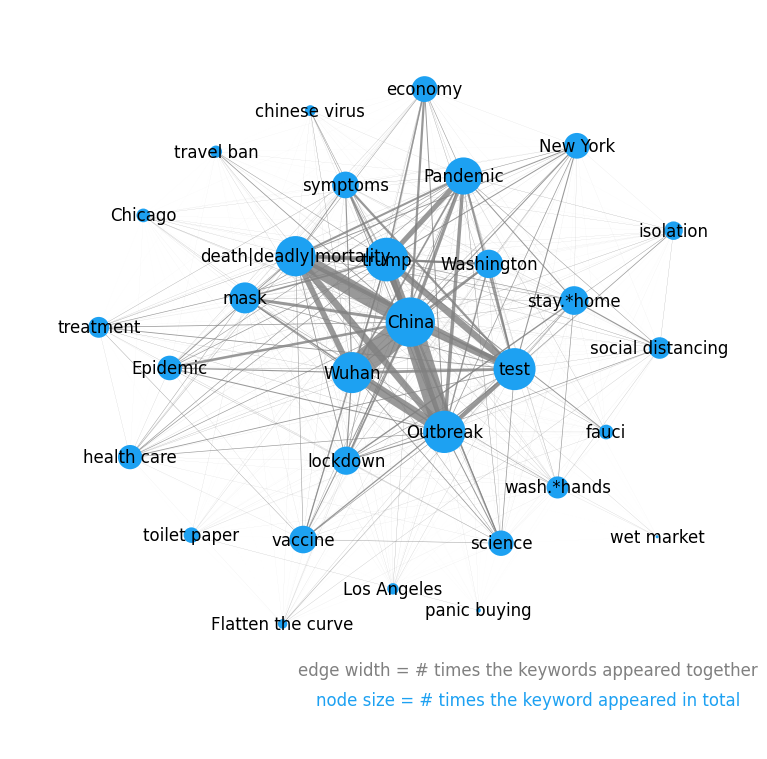

In [174]:
graph

# Visualize keywords over time

collect possible visualizations over time

In [37]:
keyword_data

,trump,social distancing,Wuhan,chinese virus,New York,Los Angeles,Chicago,Washington,mask,economy,...,wet market,travel ban,vaccine,symptoms,wash.*hands,treatment,isolation,panic buying,toilet paper,date
0,36,0,1310,18,56,16,3,16,41,11,...,3,2,24,188,19,33,11,0,0,2020-01-20
1,151,0,2138,12,91,17,53,1150,60,10,...,2,10,78,118,57,34,25,0,1,2020-01-21
2,153,0,1989,1,17,3,7,105,70,6,...,3,38,78,75,17,17,6,0,0,2020-01-22
3,128,0,1536,0,25,68,5,66,128,42,...,14,30,130,140,34,33,6,0,0,2020-01-23
4,194,0,1305,3,65,1,211,90,98,5,...,8,33,80,111,29,18,32,0,0,2020-01-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1002,109,94,19,201,23,23,117,265,79,...,12,7,126,61,30,92,59,2,11,2020-04-04
76,1394,121,74,13,222,15,34,109,242,71,...,4,3,104,210,23,116,44,0,9,2020-04-05
77,964,124,79,21,165,20,39,109,214,84,...,3,9,136,203,25,128,52,4,16,2020-04-06
78,1108,134,157,13,132,31,42,110,214,71,...,7,5,94,79,18,64,31,2,8,2020-04-07


In [45]:
#rename two columns (not sure why that is necessary, but :-|)
key_merged.rename(columns = {'stay.*home': "stay home", 'wash.*hands': "wash hands"})

keywordz = list(keyword_data.columns)
keywordz.remove('stay.*home')
keywordz.remove('wash.*hands')


In [47]:
columns1 = list(keywordz)[:-1]
columns2 = list(merged_3.columns)[1:]

select_box1 = alt.binding_select(options=columns1, name='Keyword ')
sel1 = alt.selection_single(fields=['column'], bind=select_box1, init={'column': 'trump'})

select_box2 = alt.binding_select(options=columns2, name='Compare to value ')
sel2 = alt.selection_single(fields=['column'], bind=select_box2, init={'column': 'new_cases'})

base = alt.Chart(key_merged).encode(
    x = alt.X('date:T', axis=alt.Axis(title="Date"))
).properties(
    width=600,
    height=300,
    title='Compare Keyword appearances and Pandemic Data'
)

tweets_axis = alt.Axis(title="Daily keyword appearances", titleColor=twittercol) 
value_axis = alt.Axis(title="Value", titleColor='grey')

line_one = base.transform_fold(
    columns1,
    as_=['column', 'value']
).transform_filter(
    sel1
).mark_line( interpolate='monotone', stroke=twittercol).encode(
    alt.Y('value:Q',
          axis=tweets_axis)
).add_selection(
    sel1
)

line_two = base.transform_fold(
    columns2,
    as_=['column', 'value']
).transform_filter(
    sel2
).mark_line( interpolate='monotone', stroke='grey').encode(
    alt.Y('value:Q',
          axis=value_axis)
).add_selection(
    sel2
)

alt.layer(line_one, line_two).resolve_scale(
    y = 'independent'
)

alt.LayerChart(...)

C:\Users\rapha\Anaconda3\envs\data sci env\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [40]:
columns = list(keywordz)[:-1]
columns2 = list(keywordz)[:-1]


select_box1 = alt.binding_select(options=columns, name='Keyword 1 ')
sel1 = alt.selection_single(fields=['column'], bind=select_box1, init={'column': 'trump'})

select_box2 = alt.binding_select(options=columns2, name='Keyword 2 ')
sel2 = alt.selection_single(fields=['column'], bind=select_box2, init={'column': 'mask'})

base = alt.Chart(key_merged).encode(
    x = alt.X('date:T', axis=alt.Axis(title="Date"))
).properties(
    width=600,
    height=300,
    title='Compare different Keywords'
)

tweets_axis = alt.Axis(title="Keyword 1", titleColor=twittercol) 
value_axis = alt.Axis(title="Keyword 2", titleColor=twittercol2)

line_one = base.transform_fold(
    columns1,
    as_=['column', 'value']
).transform_filter(
    sel1
).mark_line( interpolate='monotone', stroke=twittercol).encode(
    alt.Y('value:Q',
          axis=tweets_axis)
).add_selection(
    sel1
)

line_two = base.transform_fold(
    columns2,
    as_=['column', 'value']
).transform_filter(
    sel2
).mark_line( interpolate='monotone', stroke=twittercol2).encode(
    alt.Y('value:Q',
          axis=value_axis)
).add_selection(
    sel2
)

alt.layer(line_one, line_two).resolve_scale(
    y = 'independent'
)

alt.LayerChart(...)

In [42]:
key_merged

,trump,social distancing,Wuhan,chinese virus,New York,Los Angeles,Chicago,Washington,mask,economy,...,panic buying,toilet paper,date,Tweets,total_cases,new_cases,new_deaths,new_tests,cnn_articles,fox_articles
0,36,0,1310,18,56,16,3,16,41,11,...,0,0,2020-01-20,100124,480.0,40.0,0.0,343.0,0.0,3.0
1,151,0,2138,12,91,17,53,1150,60,10,...,0,1,2020-01-21,259864,786.0,306.0,6.0,300.0,0.0,6.0
2,153,0,1989,1,17,3,7,105,70,6,...,0,0,2020-01-22,508623,1070.0,284.0,22.0,348.0,2.0,10.0
3,128,0,1536,0,25,68,5,66,128,42,...,0,0,2020-01-23,905673,1264.0,194.0,0.0,360.0,2.0,20.0
4,194,0,1305,3,65,1,211,90,98,5,...,0,0,2020-01-24,1153245,1796.0,532.0,18.0,289.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,820,113,96,13,171,42,21,109,432,96,...,1,8,2020-04-03,9357113,2078194.0,155292.0,10018.0,464937.0,80.0,235.0
75,1002,109,94,19,201,23,23,117,265,79,...,2,11,2020-04-04,7928225,2242192.0,163998.0,13552.0,407454.0,36.0,120.0
76,1394,121,74,13,222,15,34,109,242,71,...,0,9,2020-04-05,7421877,2412577.0,170540.0,12616.0,423804.0,48.0,96.0
77,964,124,79,21,165,20,39,109,214,84,...,4,16,2020-04-06,8153966,2545252.0,132520.0,9512.0,387436.0,74.0,169.0


In [120]:
from PIL import Image

#tw = np.array(Image.open("trump_first_chinese.PNG"))

source = pd.DataFrame.from_records([
      {"x": dt.datetime(2020,2,16), "y": 120, "img":  "https://raw.githubusercontent.com/rlnrbio/twitter_data_viz/main/trump_first_chinese.PNG?token=AMNFTMJUQUVPQO2DCKHHO3C7SAEDE"}
])

source

,x,y,img
0,2020-02-16,120,https://raw.githubusercontent.com/rlnrbio/twit...


In [121]:
# chinese virus keyword 
from PIL import Image

chinese = key_merged[["chinese virus", "date"]]



chart = alt.Chart(chinese).mark_line(color = twittercol2, opacity = 1).encode(
    y = alt.Y('chinese virus', title = "'chinese virus' appearances in dataset", axis=alt.Axis(grid=False)),
    x = alt.X('date:T', title = "date", axis=alt.Axis(grid=False)),
    #color=alt.Color('variable', scale=alt.Scale(domain=["Tweets total", "Tweets sampled"], range=[twittercol,  twittercol2]))
    ).properties(
    width=600,
    height=300,
    title = "Trumps first 'chinese virus' tweet"
)


tweet = alt.Chart(source).mark_image(
    width=400,
    height=200
).encode(
    x='x',
    y='y',
    url='img'
)

line = alt.Chart(pd.DataFrame({'x': [dt.datetime(2020,3,16)]})).mark_rule(color = twittercol).encode(
    x='x')

nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['date'], empty='none')


selectors = alt.Chart(chinese).mark_point().encode(
    x='date:T',
    opacity=alt.value(0),
).add_selection(
    nearest
)

points = chart.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

text = chart.mark_text(align='left', color = "black", dx=5, dy=-20).encode(
    text=alt.condition(nearest, "date:T", alt.value(' '))
)

text2 = chart.mark_text(align='left', color = "black", dx=5, dy=-5).encode(
    text=alt.condition(nearest, "chinese virus:Q", alt.value(' '))
)


rules = alt.Chart(chinese).mark_rule(color='gray').encode(
    x='date:T',
).transform_filter(
    nearest
)

alt.layer(chart, selectors, points, rules, text, text2, line, tweet).resolve_scale(
    y = 'shared'
)



alt.LayerChart(...)

# Load data of trending topics from github

selecting the fifty most talked about trending topics on twitter

manually annotate the wider topic the trend belongs to (C: Coronavirus, P: Politics, D: Tweets related to a special day of the week/year, O: Other topics)



In [147]:
#trending = pd.read_csv("trending_topics_usa.csv")

trending = pd.read_csv("https://raw.githubusercontent.com/xxz-jessica/COVID-19_UCD_Challenge/master/Twitter_Trending_Topics/usa_trending.csv", encoding='latin1')

trending["date"] = pd.to_datetime(trending["date"]).map(lambda x: str(x.date()))

trending_counted = trending.groupby('trending')['date'].apply(list).reset_index(name='dates')


trending_counted2 = trending.groupby("trending").count().reset_index()

trending_selected = trending_counted.merge(trending_counted2).sort_values("date", ascending = False)

trending_selected = trending_selected[0:50]

annotations = ["Politics", "Coronavirus", "Others", "Others", "Coronavirus", "Politics", "Politics", "Coronavirus",
              "Date", "Others", "Date", "Politics", "Politics", "Date", "Date", "Politics", "Others", 
                "Coronavirus", "Coronavirus", "Politics", "Politics", "Date", "Others", "Date",
              "Date", "Coronavirus", "Politics", "Others", "Date", "Others", "Others", "Date",
              "Date", "Others", "Politics", "Politics", "Coronavirus", "Date", "Others", "Coronavirus", "Date",
              "Others", "Politics", "Politics", "Politics", "Politics", "Coronavirus", "Others", "Politics", "Coronavirus"]

trending_selected["annotation"] = annotations

trending_selected

,trending,dates,date,annotation
2880,Sanders,"[2020-02-17, 2020-02-18, 2020-02-19, 2020-02-2...",12,Politics
1823,COVID-19,"[2020-02-26, 2020-02-27, 2020-02-28, 2020-02-2...",10,Coronavirus
1758,Bloomberg,"[2020-02-01, 2020-02-12, 2020-02-13, 2020-02-1...",9,Others
1121,#TheBachelor,"[2020-01-28, 2020-02-04, 2020-02-11, 2020-02-1...",8,Others
253,#COVID2019,"[2020-03-10, 2020-03-17, 2020-03-18, 2020-03-2...",7,Coronavirus
1733,Biden,"[2020-03-01, 2020-03-02, 2020-03-03, 2020-03-0...",7,Politics
3151,Warren,"[2020-02-07, 2020-02-08, 2020-02-20, 2020-02-2...",7,Politics
1382,#coronavirus,"[2020-01-26, 2020-01-28, 2020-02-24, 2020-02-2...",7,Coronavirus
274,#Caturday,"[2020-01-25, 2020-02-01, 2020-02-08, 2020-02-2...",6,Date
3048,Tiger King,"[2020-03-27, 2020-03-28, 2020-03-29, 2020-03-3...",6,Others


# Create wordcloud using brunel to visualize trending topics

In [148]:
import brunel

In [169]:
trending_selected
brunel_js = %brunel cloud data("trending_selected") size(date) label(trending) tooltip(dates) color(annotation)

In [172]:
import IPython

type(brunel_js)

brunel_js.reload()
ret = IPython.core.display.display_javascript(brunel_js)

NoneType

In [155]:
import json
with open("javascript.json", "wb") as json_doc:
    json.dump(brunel_js, json_doc)

TypeError: Object of type Javascript is not JSON serializable

# create wordcloud using "wordcloud" 

Visualizing most used COVID related hashtags

In [128]:
import wordcloud as wc
import matplotlib.pyplot as plt
import string
from scipy.ndimage import gaussian_gradient_magnitude

In [129]:
#stupid way to create wordcloud by generating text containing number of words 
def create_text(trending_list):
    text = ""
    for i in range(0,trending_list.shape[0]):
        for j in range(0, int(trending_list.iloc[[i]]["date"])):
            text = text + " " + str(trending_list.iloc[i]["trending"])
    return text
        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   has_media         1000 non-null   bool   
 1   hashtags          1000 non-null   object 
 2   img_urls          1000 non-null   object 
 3   is_replied        1000 non-null   bool   
 4   is_reply_to       1000 non-null   bool   
 5   likes             1000 non-null   int64  
 6   links             1000 non-null   object 
 7   parent_tweet_id   62 non-null     float64
 8   replies           1000 non-null   int64  
 9   reply_to_users    1000 non-null   object 
 10  retweets          1000 non-null   int64  
 11  screen_name       1000 non-null   object 
 12  text              1000 non-null   object 
 13  text_html         1000 non-null   object 
 14  timestamp         1000 non-null   object 
 15  timestamp_epochs  1000 non-null   int64  
 16  tweet_id          1000 non-null   int64  
 

In [132]:
#all hashtags

hashtags = list(covid_twitter_data["hashtags"][covid_twitter_data["hashtags"] != '[]'])

text = list(covid_twitter_data[0:20000]["text"][covid_twitter_data["text"] != '[]'])
#real_hashs = [elem if elem != '[]': for elem in hashtags]

hashtags_string = "".join(hashtags).replace("[", "").replace("]", "").replace("''", " ").replace("', '", " ")

text = re.sub('http\S*', "",
              "".join(text).replace("[", "").replace("]", "").replace("''", " ").replace("', '", " ").replace("\n", " "),
                  )

In [133]:
#shapes:
twitter_bird = "twitter_bird.jpg"
virus = "virus.jpg"
#use twitter logo as mask
# load image. This has been modified in gimp to be brighter and have more saturation.
img = np.array(Image.open(twitter_bird))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
img = img[::3, ::3]
# create mask  white is "masked out"
mask = img.copy()
mask[mask.sum(axis=2) == 0] = 255
# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(img[:, :, i] / 255., 2) for i in range(3)], axis=0)
mask[edges > .08] = 255



In [134]:
cloud = wc.WordCloud(max_words=2000, mask=mask, background_color="white",
               max_font_size=20, random_state=42,
               relative_scaling=0)

image_colors = wc.ImageColorGenerator(np.array(Image.open("blue.webp")))

cloud.generate(hashtags_string)

cloud.recolor(color_func=image_colors)


plt.imshow(cloud)
plt.axis("off")

(-0.5, 682.5, 495.5, -0.5)

In [135]:

cloud2 = wc.WordCloud(max_words=2000, mask=mask, background_color="white",
               max_font_size=20, random_state=42,
               relative_scaling=0)

image_colors = wc.ImageColorGenerator(np.array(Image.open("blue.webp")))

cloud2.generate(text)

cloud2.recolor(color_func=image_colors)
cd = cloud2.to_file("cloud2.jpg")


In [141]:
covid_twitter_data["timestamp"] = pd.to_datetime(covid_twitter_data["timestamp"]).map(lambda x: (x.date()))

dates = np.unique(covid_twitter_data["timestamp"])


array([datetime.date(2020, 1, 20), datetime.date(2020, 1, 21),
       datetime.date(2020, 1, 22), datetime.date(2020, 1, 23),
       datetime.date(2020, 1, 24), datetime.date(2020, 1, 25),
       datetime.date(2020, 1, 26), datetime.date(2020, 1, 27),
       datetime.date(2020, 1, 28), datetime.date(2020, 1, 29),
       datetime.date(2020, 1, 30), datetime.date(2020, 1, 31),
       datetime.date(2020, 2, 1), datetime.date(2020, 2, 2),
       datetime.date(2020, 2, 3), datetime.date(2020, 2, 4),
       datetime.date(2020, 2, 5), datetime.date(2020, 2, 6),
       datetime.date(2020, 2, 7), datetime.date(2020, 2, 8),
       datetime.date(2020, 2, 9), datetime.date(2020, 2, 10),
       datetime.date(2020, 2, 11), datetime.date(2020, 2, 12),
       datetime.date(2020, 2, 13), datetime.date(2020, 2, 14),
       datetime.date(2020, 2, 15), datetime.date(2020, 2, 16),
       datetime.date(2020, 2, 17), datetime.date(2020, 2, 18),
       datetime.date(2020, 2, 19), datetime.date(2020, 2, 20),
 

In [143]:
def create_image(twitter_data, date, image_colors = image_colors, column = "text", path = "", filter = True, replace = []):
    covid_day = twitter_data[twitter_data["timestamp"] == date]
    if filter:
        text = list(covid_day["text"].fillna(" "))[0:10000]
    else:
        text = list(covid_day["text"].fillna(" "))
    text = "".join(text)
    text = re.sub('http\S*', "",
              text.replace("[", "").replace("]", "").replace("''", " ").replace("', '", " ").replace("\n", " "),
                  )
    for elem in replace:
        text = re.sub(elem, "", text, flags = re.IGNORECASE )
    print(date)
    cloud = wc.WordCloud(max_words=2000, mask=mask, background_color="white",
                   max_font_size=20, random_state=42,
                   relative_scaling=0)

    cloud.generate(text)

    cloud.recolor(color_func=image_colors)
    cloud.to_file(path + str(date) + ".jpg")
    del(cloud)
    return 1

    
    

    

In [144]:
for date in dates:
    create_image(covid_twitter_data, 
                 date, 
                 column = "text", 
                 image_colors = image_colors, 
                 path = "C:/Users/rapha/DATA_VIS/twitter_data_viz/twitter_data_viz/text_wordclouds/",
                 filter = False,
                 replace = ["Coronavirus", "coronavirus", "covid19", "covid2019"])

2020-01-20
2020-01-21
2020-01-22
2020-01-23
2020-01-24
2020-01-25
2020-01-26
2020-01-27
2020-01-28
2020-01-29
2020-01-30
2020-01-31
2020-02-01
2020-02-02
2020-02-03
2020-02-04
2020-02-05
2020-02-06
2020-02-07
2020-02-08
2020-02-09
2020-02-10
2020-02-11
2020-02-12
2020-02-13
2020-02-14
2020-02-15
2020-02-16
2020-02-17
2020-02-18
2020-02-19
2020-02-20
2020-02-21
2020-02-22
2020-02-23
2020-02-24
2020-02-25
2020-02-26
2020-02-27
2020-02-28
2020-02-29
2020-03-01
2020-03-02
2020-03-03
2020-03-04
2020-03-05
2020-03-06
2020-03-07
2020-03-08
2020-03-09
2020-03-10
2020-03-11
2020-03-12
2020-03-13
2020-03-14
2020-03-15
2020-03-16
2020-03-17
2020-03-18
2020-03-19
2020-03-20
2020-03-21
2020-03-22
2020-03-23
2020-03-24
2020-03-25
2020-03-26
2020-03-27
2020-03-28
2020-03-29
2020-03-30
2020-03-31
2020-04-01
2020-04-02
2020-04-03
2020-04-04
2020-04-05
2020-04-06
2020-04-07
2020-04-08


# look for the most shared links

In [4]:
trending_links = (covid_twitter_data["links"].value_counts())
    
trending_links = pd.DataFrame(trending_links)

In [7]:
trending_links[0:30]

,links
[],564491
['https://twitter.com/i/events/1219057585707315201'],2613
['https://twitter.com/messages/compose?recipient_id=835740314006511618&text=Covid%20Act'],1185
['https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6'],827
['http://SURGICALMASK.vuhere.com'],541
['https://twitter.com/i/events/1219687502237167616'],517
"['https://hsl-pnw-downloadable-files.s3.amazonaws.com/1181/the1%move_january27,2020-c7c7fe657ab9460e94fe2135c3fbaf0e.pdf']",499
['http://allexpressnews.com/virus.html'],398
['https://twitter.com/_onerolita/status/1234999382090514432'],311
"['http://allexpressnews.com/virus.html', 'https://youtu.be/cUdRkfhAa64']",298
